In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/binaryclassificationwithabankchurndataset/sample_submission.csv
/kaggle/input/binaryclassificationwithabankchurndataset/train.csv
/kaggle/input/binaryclassificationwithabankchurndataset/test.csv


In [165]:
import numpy as np # linear algebra
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## **Step 1: Upload data**

In [166]:
train=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/train.csv')
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [167]:
test=pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/test.csv')
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


## **Step 2 (Data Analysis): Checking& Cleaning & Preparation for Machine Learning**

In [168]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [170]:
train=train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [171]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

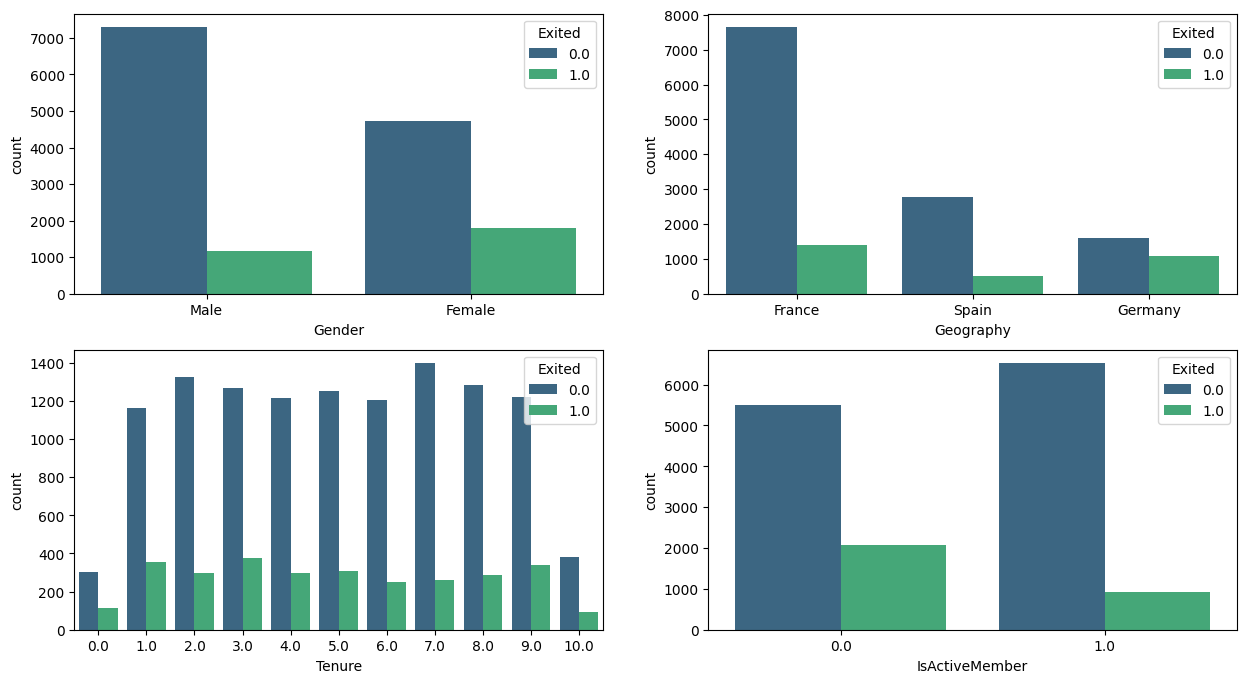

In [172]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=train, ax=axes[0,0])
sns.countplot(x='Geography', hue='Exited', palette='viridis', data=train, ax=axes[0,1])
sns.countplot(x='Tenure', hue='Exited', palette='viridis', data=train, ax=axes[1,0])
sns.countplot(x='IsActiveMember', hue='Exited', palette='viridis', data=train, ax=axes[1,1])

plt.show()

## **Step 3 : Checking Correlation**

In [173]:
cat_cols = ['Geography', 'Gender']
encoder=OneHotEncoder(sparse_output=False)
cat_encoded=encoder.fit_transform(train[cat_cols])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_cols), index=train.index)

train_num = train.drop(columns=cat_cols)
train_encoded = pd.concat([train_num, cat_encoded_df], axis=1)

train_encoded=train_encoded.drop(columns=['id','Surname','CustomerId'])
train_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,567.0,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0,1.0,0.0,0.0,0.0,1.0
1,628.0,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0,1.0,0.0,0.0,1.0,0.0
2,635.0,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0,1.0,0.0,0.0,1.0,0.0
3,681.0,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0,1.0,0.0,0.0,0.0,1.0
4,587.0,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0,1.0,0.0,0.0,1.0,0.0


In [174]:
train_encoded.corrwith(train_encoded.Exited)

CreditScore         -0.052375
Age                  0.449425
Tenure              -0.032897
Balance              0.160062
NumOfProducts       -0.312812
HasCrCard           -0.010670
IsActiveMember      -0.188748
EstimatedSalary      0.035193
Exited               1.000000
Geography_France    -0.137703
Geography_Germany    0.242651
Geography_Spain     -0.061859
Gender_Female        0.169465
Gender_Male         -0.169465
dtype: float64

### **According to the correlation, the biggest contributor is age with alomost 45%.**

In [175]:
y=train['Exited']
X=train.drop(columns=['Exited','id','Surname','CustomerId'])

**We dropped some exact unnecessary columns, because they're probably not predictive of whether someone will exit**

In [176]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89
1,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99
2,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19
3,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64
4,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90


In [177]:
X_cat=['Geography','Gender']
X_num=X.drop(columns=['Geography','Gender'])

## **Step 4: Pipeline**

In [178]:

num_attribs=list(X_num)
cat_attribs=list(X_cat)

full_pipeline=ColumnTransformer([
          ('cat', OneHotEncoder(), cat_attribs),
          ('num', StandardScaler(), num_attribs )             
])

In [179]:
X_transformed=full_pipeline.fit_transform(X)
X_transformed

array([[ 1.        ,  0.        ,  0.        , ...,  0.53242593,
        -0.99203175,  0.86541443],
       [ 1.        ,  0.        ,  0.        , ...,  0.53242593,
         1.00803226, -1.41067931],
       [ 1.        ,  0.        ,  0.        , ...,  0.53242593,
         1.00803226, -0.08393507],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.53242593,
         1.00803226,  0.96937493],
       [ 0.        ,  1.        ,  0.        , ...,  0.53242593,
        -0.99203175,  0.43272535],
       [ 1.        ,  0.        ,  0.        , ...,  0.53242593,
         1.00803226,  1.01255962]])

## **Step 5: Train and Test sets**

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

## **Step 6: Machine Learning Models**

## **Logistic Regression Model**

In [181]:
LR_classifier=LogisticRegression()
LR_model=LR_classifier.fit(X_train, y_train)

In [182]:
y_pred=LR_model.predict(X_test)

In [183]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2424
         1.0       0.72      0.53      0.61       576

    accuracy                           0.87      3000
   macro avg       0.81      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000

Model accuracy: 0.8706666666666667


## **RandomForest Model**

In [184]:
model_RF=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
RF_model=model_RF.fit(X_train, y_train)
y_pred=RF_model.predict(X_test)

In [185]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2424
         1.0       0.81      0.52      0.63       576

    accuracy                           0.88      3000
   macro avg       0.85      0.74      0.78      3000
weighted avg       0.88      0.88      0.87      3000

Model accuracy: 0.8843333333333333


## **Gradient Booster Regression**

In [186]:
model_GB = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)

In [187]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2424
         1.0       0.74      0.68      0.71       576

    accuracy                           0.89      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Model accuracy: 0.8926666666666667


## **KNN Model**

In [188]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [189]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2424
         1.0       0.71      0.60      0.65       576

    accuracy                           0.88      3000
   macro avg       0.81      0.77      0.79      3000
weighted avg       0.87      0.88      0.87      3000

Model accuracy: 0.8763333333333333


## **XGBoost Classifier**

In [190]:
XGB_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
XGB_model.fit(X_train, y_train)
y_pred=XGB_model.predict(X_test)

In [191]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2424
         1.0       0.72      0.68      0.70       576

    accuracy                           0.89      3000
   macro avg       0.82      0.81      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Model accuracy: 0.8876666666666667


***Results:***


'Logistic Regression': **87%**

'Random Forest': **88.4%**

'XGBoost': **88.7%**

'KNN' : **87.6 %**

'GBooster' : **89.2%**


The best accuracy is **89.2 %** with **'GBooster Model'**.

## **Submission**

In [192]:
test_data=test.drop(columns=['id','Surname','CustomerId'])
test_transformed=full_pipeline.fit_transform(test_data)
y_test_pred=XGB_model.predict(test_transformed)

In [193]:
submission = pd.DataFrame({
    'id': test['id'],  
    'Exited': y_test_pred
})

submission.to_csv('submission.csv', index=False)